In [1]:
from bowler_stats import Bowler
from innings import Innings
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Set parameters
bowler_name_1 = "P Kumar"
bowler_name_2 = "Harbhajan Singh"
match_dataframe = pd.read_csv("../data/matches_2017.csv")
deliveries_dataframe = pd.read_csv("../data/deliveries_2017.csv")


In [3]:
#Instantiate the bowler class to acquire data
bowler_info_1 = Bowler(bowler_name_1, match_dataframe, deliveries_dataframe) 
bowler_info_2 = Bowler(bowler_name_2, match_dataframe, deliveries_dataframe)

[13, 13, 12, 13, 16, 15, 3, 12, 16, 6]


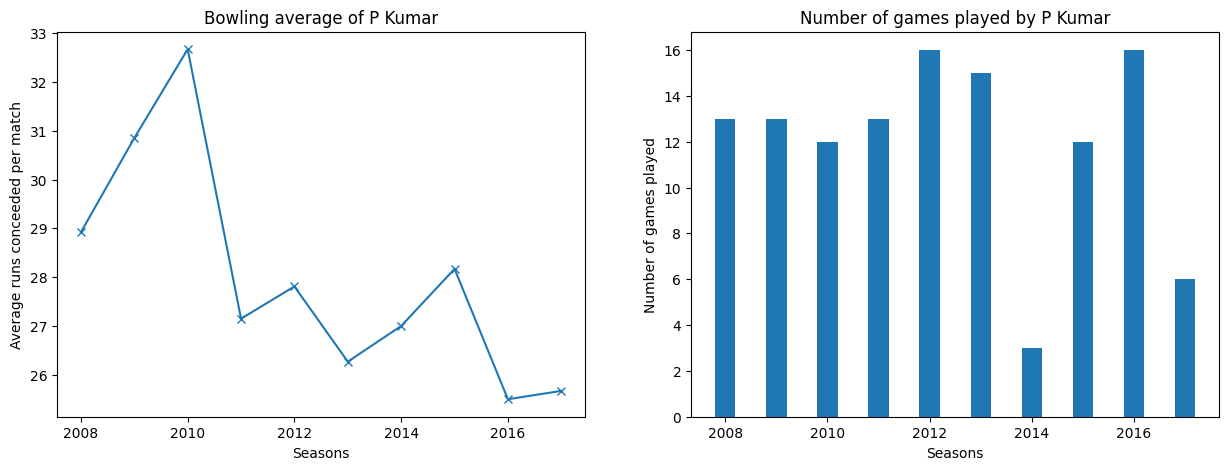

In [15]:
#Statistics
bowl_average = []
games_played = []
years = np.arange(2008, 2018)
for year in years:
    bowl_average.append(bowler_info_1.get_average_runs(year))
    games_played.append(bowler_info_1.get_number_of_runs(year)[0])
print(games_played)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(bowler_info_1.valid_years, bowl_average, marker="x")
ax[0].title.set_text(f"Bowling average of {bowler_name_1}")
ax[0].set_xlabel("Seasons")
ax[0].set_ylabel("Average runs conceeded per match")
ax[1].bar(bowler_info_1.valid_years, games_played, 0.4)
ax[1].title.set_text(f"Number of games played by {bowler_name_1}")
ax[1].set_xlabel("Seasons")
ax[1].set_ylabel("Number of games played")
plt.savefig("../graphs/BowlingStatPlayer.png")



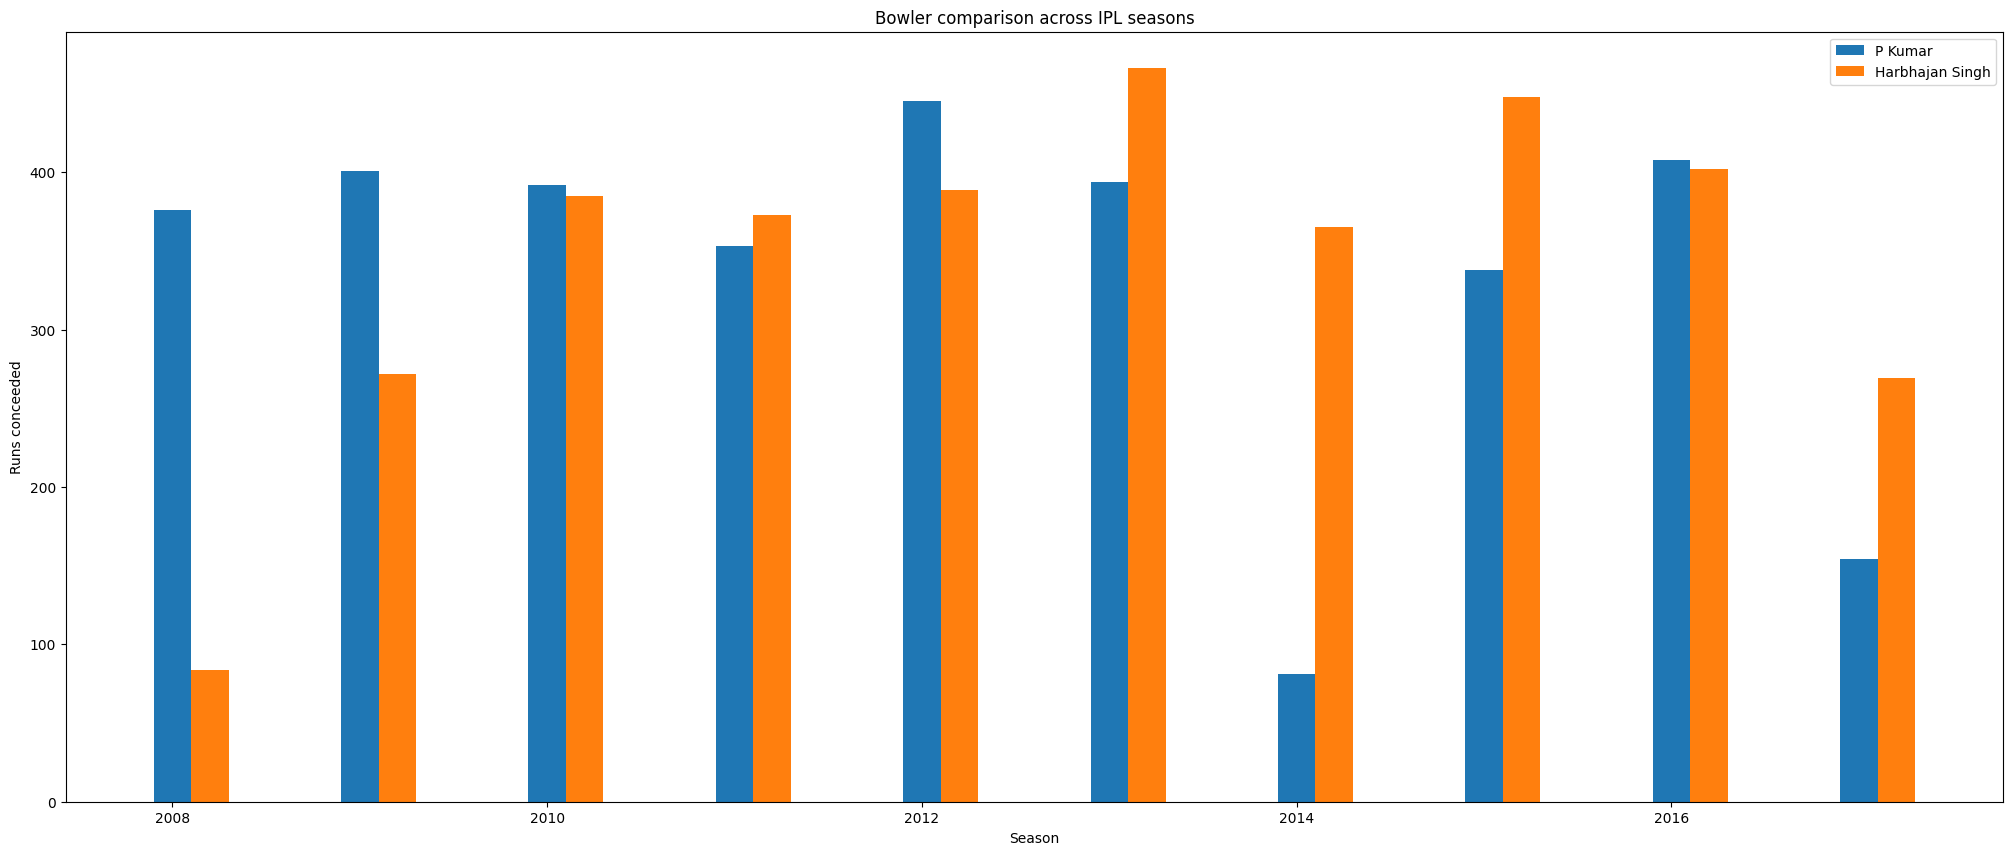

In [16]:
runs, games, average = bowler_info_1.compare_bowlers(bowler_info_2)

plt.figure(figsize=(25, 10))
plt.bar(bowler_info_1.valid_years, [run[0] for run in runs], width=0.2, label = bowler_name_1)
plt.bar(bowler_info_2.valid_years + 0.2, [run[1] for run in runs], width=0.2,  label = bowler_name_2)
# plt.xticks(X_axis, X)
plt.xlabel("Season")
plt.ylabel("Runs conceeded")
plt.title("Bowler comparison across IPL seasons")
plt.legend()
plt.savefig("../graphs/BowlerComparision.png")

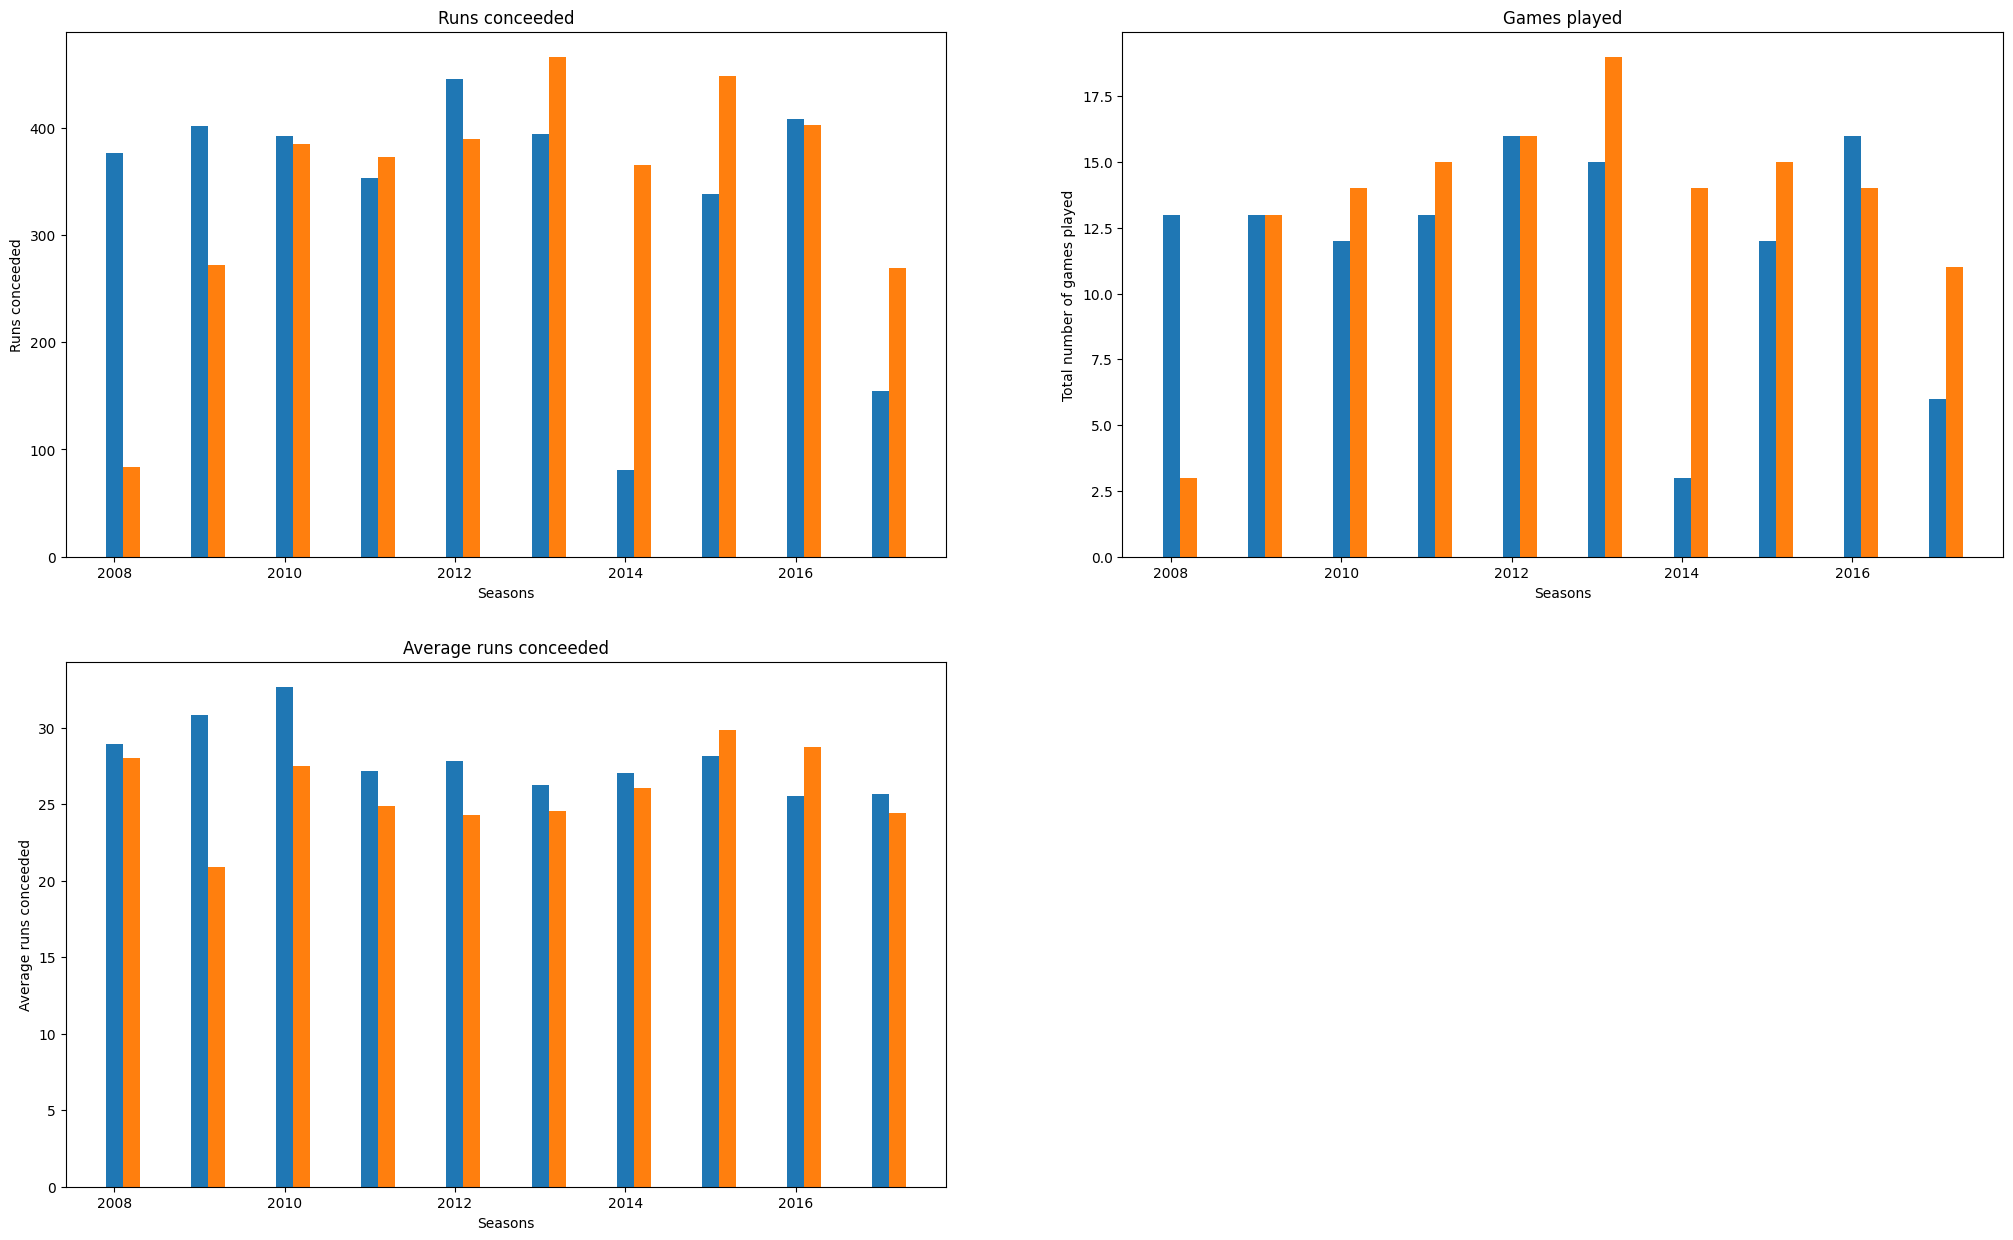

<Figure size 640x480 with 0 Axes>

In [17]:

runs, games, average = bowler_info_1.compare_bowlers(bowler_info_2)
default_x_ticks = range(len(bowler_info_1.valid_years))

fig, ax = plt.subplots(2, 2, figsize=(25, 15))
ax[0, 0].bar(bowler_info_1.valid_years, runs[:, 0], width=0.2, label = bowler_name_1)
ax[0, 0].bar(bowler_info_2.valid_years + 0.2, runs[:, 1], width=0.2,  label = bowler_name_2)
ax[0, 0].set_title("Runs conceeded")
ax[0, 0].set_xticks(bowler_info_1.valid_years[::2]) 
ax[0, 0].set_xlabel("Seasons")
ax[0, 0].set_ylabel("Runs conceeded")

ax[0, 1].bar(bowler_info_1.valid_years, games[:, 0], width=0.2, label = bowler_name_1)
ax[0, 1].bar(bowler_info_2.valid_years + 0.2, games[:, 1], width=0.2,  label = bowler_name_2)
ax[0, 1].set_title("Games played")
ax[0, 1].set_xticks(bowler_info_1.valid_years[::2])
ax[0, 1].set_xlabel("Seasons")
ax[0, 1].set_ylabel("Total number of games played")

ax[1, 0].bar(bowler_info_1.valid_years, average[:, 0], width=0.2, label = bowler_name_1)
ax[1, 0].bar(bowler_info_2.valid_years + 0.2, average[:, 1], width=0.2,  label = bowler_name_2)
ax[1, 0].set_title("Average runs conceeded")
ax[1, 0].set_xticks(bowler_info_1.valid_years[::2]) 
ax[1, 0].set_xlabel("Seasons")
ax[1, 0].set_ylabel("Average runs conceeded")
ax[1, 1].axis("off")
plt.show()
plt.savefig("../graphs/BowlerComparisionDetailed.png")

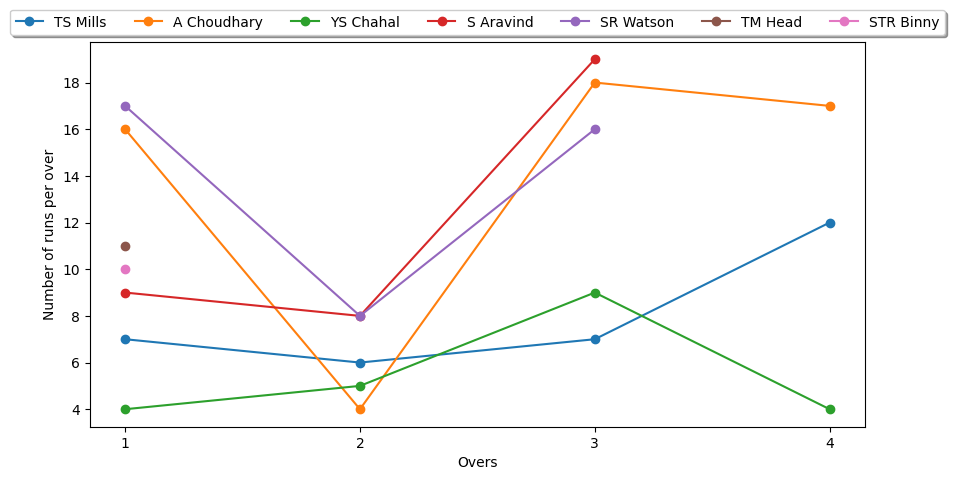

In [14]:
id = 1
innings = 1
game = Innings(deliveries_dataframe, id)
bowler_runs_stat = game.get_bowling_stat_inning(innings)

plt.figure(figsize=(10, 5))
for key, value in bowler_runs_stat.items():
    plt.plot(value, label=key, marker="o")

plt.xticks(range(0, 4), [1, 2, 3, 4])
plt.xlabel("Overs")
plt.ylabel("Number of runs per over")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0),
    fancybox=True, shadow=True, ncol=len(bowler_runs_stat.keys()))
plt.savefig("../graphs/OverComparisionPerInnings.png")


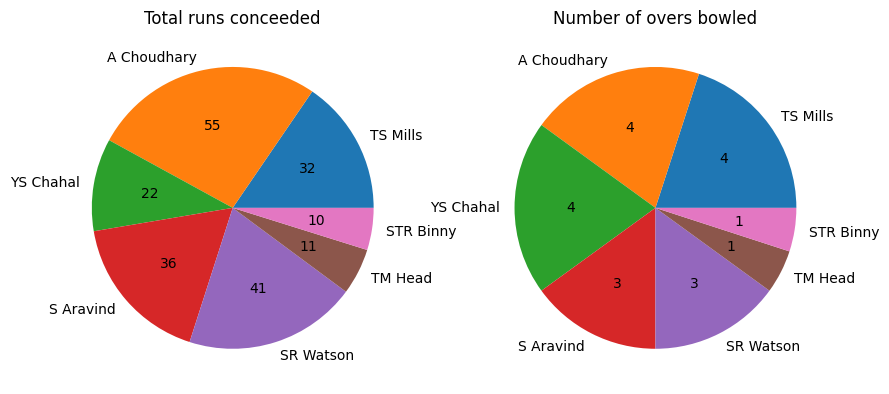

In [18]:
bowler_runs_stat = game.get_bowling_stat_inning(innings)
total_runs = {}
for key in bowler_runs_stat:
        total_runs[key] = [len(bowler_runs_stat[key]), np.array(bowler_runs_stat[key]).sum()]

plt.subplots(1, 2, figsize=(10, 5))
total_overs_list = np.array(list(total_runs.values()))[:, 0]
total_runs_list = np.array(list(total_runs.values()))[:, 1]
labels = np.array(list(total_runs.keys()))
plt.subplot(121)
plt.title("Total runs conceeded")
p, tx, autotexts = plt.pie(total_runs_list, labels=labels, autopct="%1.1f%%",)
for i, a in enumerate(autotexts):
    a.set_text("{}".format(total_runs_list[i]))
plt.subplot(122)
plt.title("Number of overs bowled")
_, _, autotexts = plt.pie(total_overs_list, labels=labels, autopct="")
for i, a in enumerate(autotexts):
    a.set_text("{}".format(total_overs_list[i]))

plt.savefig("../graphs/inningspierchart.png")